In [23]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pypfopt import EfficientFrontier, risk_models, expected_returns, plotting

In [24]:
# Step 2: Load Data from Excel
file_path = r"D:\personal\bdas.spyberpolymath.com\project\data\Financial_Portfolio.xlsx"
df = pd.read_excel(file_path)

In [25]:
# Preview Data
print("Data Preview:")
print(df.head())

Data Preview:
        Date   Asset   Price  RiskScore
0 2025-01-01   BondC  486.31       0.91
1 2025-01-02    ETF1  398.81       0.24
2 2025-01-03  StockA  472.77       0.14
3 2025-01-04   BondC  452.67       0.49
4 2025-01-05   BondC  319.05       0.99


In [26]:
# Step 3: Data Preparation
# Ensure the Date column is in datetime format if needed
if 'Date' in df.columns:
    try:
        df['Date'] = pd.to_datetime(df['Date'], origin='1899-12-30', unit='D')
    except:
        df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Pivot data to have Assets as columns and Prices as values
price_data = df.pivot(index='Date', columns='Asset', values='Price').fillna(method='ffill')

C:\Users\amana\AppData\Local\Temp\ipykernel_18088\3105923327.py:10: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  price_data = df.pivot(index='Date', columns='Asset', values='Price').fillna(method='ffill')


In [27]:
# Step 4: Calculate Expected Returns and Covariance
mu = expected_returns.mean_historical_return(price_data)
S = risk_models.sample_cov(price_data)

In [28]:
# Step 5: Optimize Portfolio
ef = EfficientFrontier(mu, S)

In [29]:
# FIX: Use min_volatility for small datasets instead of max_sharpe
weights = ef.min_volatility()
cleaned_weights = ef.clean_weights()
print("\nOptimal Weights (Min Volatility):")
print(cleaned_weights)


Optimal Weights (Min Volatility):
OrderedDict({'BondC': 0.25501, 'ETF1': 0.3308, 'StockA': 0.27266, 'StockB': 0.14153})


In [30]:
# Step 6: Portfolio Performance Metrics
performance = ef.portfolio_performance(verbose=True)

Expected annual return: -81.7%
Annual volatility: 491.9%
Sharpe Ratio: -0.17


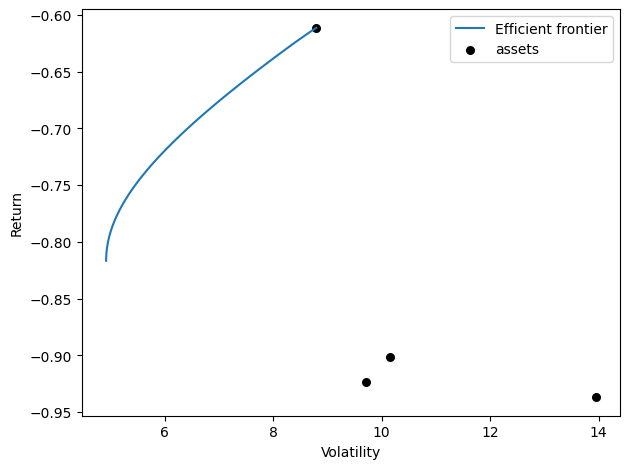

In [31]:
# Step 7: Plot Efficient Frontier
# Create a fresh instance
ef_plot = EfficientFrontier(mu, S)  # NEW instance
plotting.plot_efficient_frontier(ef_plot, show_assets=True)
plt.show()